# Challenge di prova - Mushroom dataset
## Notebook di **training**.

In [215]:
!pip install -r requirements.txt

     |████████████████████████████████| 15.1 MB 4.0 MB/s 
     |████████████████████████████████| 9.8 MB 12.4 MB/s 
     |████████████████████████████████| 13.2 MB 22.0 MB/s 
     |████████████████████████████████| 215 kB 49.8 MB/s 
     |████████████████████████████████| 11.0 MB 61.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-l

## Import delle librerie necessarie

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import del **Training Set** e del **Test Set**

In [237]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

## Data analysis

In [238]:
# stampo la lista delle feature
train.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [239]:
# stampo un sample del dataset per avere un'idea delle variabili
train.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
970,p,f,s,p,t,n,f,c,b,g,...,s,w,w,p,w,t,p,r,v,g
4206,p,f,y,n,f,s,f,c,n,b,...,k,p,p,p,w,o,e,w,v,d
4006,p,x,y,y,f,f,f,c,b,p,...,k,b,n,p,w,o,l,h,v,p
2196,e,f,y,y,t,a,f,c,b,n,...,y,w,w,p,w,o,p,k,s,g
4656,p,k,s,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l


In [240]:
train.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5199,5199,5199,5199,5199,5199,5199,5199,5199,5199,...,5199,5199,5199,5199,5199,5199,5199,5199,5199,5199
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,2678,2354,2090,1458,3029,2247,5072,4373,3589,1126,...,3169,2846,2814,5199,5076,4783,2534,1549,2584,2022


In [241]:
test.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300,...,1300,1300,1300,1300,1300,1300,1300,1300,1300,1300
unique,2,6,3,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,687,602,512,365,773,586,1259,1078,907,272,...,775,727,688,1300,1264,1193,620,387,634,491


In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     5199 non-null   object
 1   cap-shape                 5199 non-null   object
 2   cap-surface               5199 non-null   object
 3   cap-color                 5199 non-null   object
 4   bruises                   5199 non-null   object
 5   odor                      5199 non-null   object
 6   gill-attachment           5199 non-null   object
 7   gill-spacing              5199 non-null   object
 8   gill-size                 5199 non-null   object
 9   gill-color                5199 non-null   object
 10  stalk-shape               5199 non-null   object
 11  stalk-root                5199 non-null   object
 12  stalk-surface-above-ring  5199 non-null   object
 13  stalk-surface-below-ring  5199 non-null   object
 14  stalk-color-above-ring  

In [243]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     1300 non-null   object
 1   cap-shape                 1300 non-null   object
 2   cap-surface               1300 non-null   object
 3   cap-color                 1300 non-null   object
 4   bruises                   1300 non-null   object
 5   odor                      1300 non-null   object
 6   gill-attachment           1300 non-null   object
 7   gill-spacing              1300 non-null   object
 8   gill-size                 1300 non-null   object
 9   gill-color                1300 non-null   object
 10  stalk-shape               1300 non-null   object
 11  stalk-root                1300 non-null   object
 12  stalk-surface-above-ring  1300 non-null   object
 13  stalk-surface-below-ring  1300 non-null   object
 14  stalk-color-above-ring  

In [244]:
# controllo la presenza di valori nulli
pd.isnull(train).sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [245]:
pd.isnull(test).sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Non ci sono valori nulli tra gli esempi del dataset.

In [246]:
# codifico i 'categorical values'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in train.columns:
    train[i] = le.fit_transform(train[i])

for i in test.columns:
    test[i] = le.fit_transform(test[i])

In [247]:
train.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1367,1,2,0,9,0,2,1,0,0,2,...,1,6,4,0,2,1,2,1,5,0
4340,0,5,0,3,0,5,1,1,0,7,...,2,7,7,0,2,2,4,7,2,1
916,1,2,0,3,0,2,1,0,0,3,...,1,4,6,0,2,1,2,1,5,0
545,1,3,3,4,0,2,1,0,1,0,...,1,6,7,0,2,1,0,7,4,0
1946,1,5,3,4,0,8,1,0,1,0,...,2,7,7,0,2,1,0,7,4,4


In [248]:
test.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
949,1,2,1,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,4
869,1,3,2,2,0,8,1,0,1,0,...,1,7,6,0,2,1,0,7,4,0
377,0,2,2,4,1,5,1,0,0,5,...,2,6,7,0,2,1,4,2,4,0
1081,0,5,0,3,0,5,1,0,1,4,...,2,7,7,0,2,1,4,3,5,5
1140,0,0,1,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,2,3,3


In [249]:
# elimino le feature non necessarie
train.drop(['veil-type'], axis = 1, inplace = True)
test.drop(['veil-type'], axis = 1, inplace = True)

### La feature *'veil-type'* ha lo stesso valore per tutti gli esempi del dataset, non dà quindi alcuna informazione.

<AxesSubplot:xlabel='class', ylabel='count'>

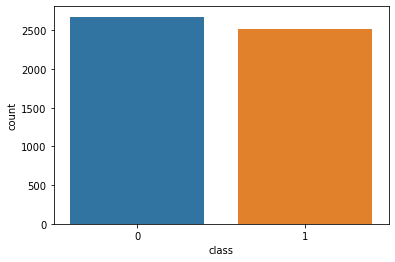

In [250]:
sns.countplot(x = 'class', data = train)

## Definizione del modello

In [251]:
X_train = train.drop(["class"], axis=1)
y_train = train["class"]

X_test = test.drop(["class"], axis=1)
y_test = test["class"]

## Addestramento del modello

### Decision Tree

In [252]:
# fase di training
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# verifichiamo l'accuracy
from sklearn.metrics import accuracy_score
dt_ac = accuracy_score(y_test, y_pred)
print('accuracy score = ', dt_ac)

accuracy score =  1.0
